# ECE 657A : Data and Knowledge Modeling and Analysis

## Assignment 1 : Classification using Naive Bayes, decision tree,random forest, XGBoost random forest, XGBoost Parameter Estimation using MLE and MAP

## Covid dataset

#### Libraries Used:
- numpy
- pandas
- seaborn
- matplotlib
- scipy
- scikit-learn

### Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load Covid dataset  

In [2]:
df = pd.read_csv('covid_train.csv')

In [3]:
df.columns

Index(['Age_Group', 'Client_Gender', 'Case_AcquisitionInfo',
       'Reporting_PHU_City', 'Outbreak_Related', 'Reporting_PHU_Latitude',
       'Reporting_PHU_Longitude', 'Outcome1'],
      dtype='object')

In [4]:
df.describe()

,Reporting_PHU_Latitude,Reporting_PHU_Longitude
count,14851.000000,14851.000000
mean,43.741457,-79.565291
std,0.752952,1.589850
min,42.308796,-94.488254
25%,43.647471,-79.708893
50%,43.656591,-79.379358
75%,43.656591,-79.379358
max,49.769615,-74.736298


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14851 entries, 0 to 14850
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age_Group                14845 non-null  object 
 1   Client_Gender            14851 non-null  object 
 2   Case_AcquisitionInfo     14851 non-null  object 
 3   Reporting_PHU_City       14851 non-null  object 
 4   Outbreak_Related         5831 non-null   object 
 5   Reporting_PHU_Latitude   14851 non-null  float64
 6   Reporting_PHU_Longitude  14851 non-null  float64
 7   Outcome1                 14851 non-null  object 
dtypes: float64(2), object(6)
memory usage: 928.3+ KB


In [6]:
df.head()

,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1
0,50s,MALE,NO KNOWN EPI LINK,Oakville,NaN,43.413997,-79.744796,Resolved
1,20s,FEMALE,CC,Guelph,NaN,43.524881,-80.233743,Not Resolved
2,90s,FEMALE,OB,Barrie,Yes,44.410713,-79.686306,Resolved
3,20s,FEMALE,MISSING INFORMATION,Toronto,NaN,43.656591,-79.379358,Resolved
4,90s,FEMALE,OB,Ottawa,Yes,45.345665,-75.763912,Fatal


#### It's always a good practice to work with a dataset where the target classes are of approximately equal size. We see the dataset is balanced.

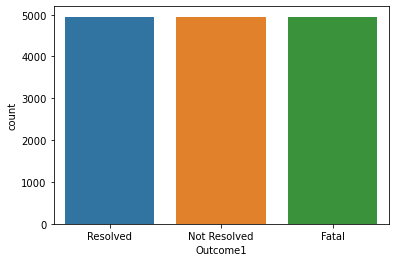

In [7]:
sns.countplot(x='Outcome1',data=df)

In [8]:
df.isna().sum()

Age_Group                     6
Client_Gender                 0
Case_AcquisitionInfo          0
Reporting_PHU_City            0
Outbreak_Related           9020
Reporting_PHU_Latitude        0
Reporting_PHU_Longitude       0
Outcome1                      0
dtype: int64

#### We notice NaN values in Age_Group and Outbreak_Related. Since the number of NaN in Age_Group is a small number, we can drop the rows. Whereas, in Outbreak_Related since the feature has Yes/No values, the NaN entries can be considered as No.

In [9]:
# Removing NAn values from age group 
df = df[df['Age_Group'].notna()]
df['Outbreak_Related'].fillna(value='No', inplace=True)

In [10]:
df.isna().sum()

Age_Group                  0
Client_Gender              0
Case_AcquisitionInfo       0
Reporting_PHU_City         0
Outbreak_Related           0
Reporting_PHU_Latitude     0
Reporting_PHU_Longitude    0
Outcome1                   0
dtype: int64

### Encoding features 

#### Ordinal encoding 'Áge_Group' and One Hot Encoding the categorical features 'Client_Gender', 'Case_AcquisitionInfo', 'Reporting_PHU_City', 'Outbreak_Related' so values have the same distances. 

In [11]:
# one-hot encoding for categorical variables and ordinal encoding for age group column
cats = ['Client_Gender', 'Case_AcquisitionInfo', 'Reporting_PHU_City', 'Outbreak_Related']
df['Outcome1'].replace(['Resolved', 'Not Resolved', 'Fatal'],[0,1,2], inplace = True)
df['Age_Group'].replace(['<20', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s'],[19,20,30,40,50,60,70,80,90], inplace = True)
df_temp = pd.get_dummies(df.iloc[:,:-1], columns=cats, drop_first=True)
df_temp['Outcome1'] = df['Outcome1']
df = df_temp

In [12]:
df.head()

,Age_Group,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Client_Gender_GENDER DIVERSE,Client_Gender_MALE,Client_Gender_UNSPECIFIED,Case_AcquisitionInfo_MISSING INFORMATION,Case_AcquisitionInfo_NO KNOWN EPI LINK,Case_AcquisitionInfo_OB,Case_AcquisitionInfo_TRAVEL,...,Reporting_PHU_City_Sudbury,Reporting_PHU_City_Thorold,Reporting_PHU_City_Thunder Bay,Reporting_PHU_City_Timmins,Reporting_PHU_City_Toronto,Reporting_PHU_City_Waterloo,Reporting_PHU_City_Whitby,Reporting_PHU_City_Windsor,Outbreak_Related_Yes,Outcome1
0,50,43.413997,-79.744796,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,43.524881,-80.233743,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,90,44.410713,-79.686306,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,20,43.656591,-79.379358,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,90,45.345665,-75.763912,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,2


# Unprocessed Dataset

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

# splitting data and target
X = df.drop(['Outcome1'], axis=1)
y = df['Outcome1']

# dividing the data into train and test sets (80%, 20%) with random_state=0
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Decision Tree

In [14]:
# find best value for max depth parameter using gridsearchcv
param_grid = {
   'max_depth': [3, 5, 10, None]
       }

tree = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=10)
grid_search.fit(X_train_val, y_train_val)
grid_search.best_params_

{'max_depth': 5}

In [15]:
# using cross validation on train set to fine tune the max depth parameter 
max_depth = [3, 5, 10, None]
Scores = []
max_acc=0
max_dep=0
for k in max_depth:
    clf = DecisionTreeClassifier(max_depth=k, random_state=0)
    clf.fit(X_train_val, y_train_val)
    accuracy = cross_val_score(clf, X_train_val, y_train_val, cv=10, scoring='accuracy')
    print(accuracy.mean())
    Scores.append(accuracy.mean())
    if(accuracy.mean() > max_acc):
        max_acc=accuracy.mean()
        max_dep=k
print('The maximum accuracy value is ', max_acc)
print('The best value of maximum depth is ', max_dep) 

0.6521586973356139
0.6579682673406347
0.6567054283355884
0.6438206836690409
The maximum accuracy value is  0.6579682673406347
The best value of maximum depth is  5


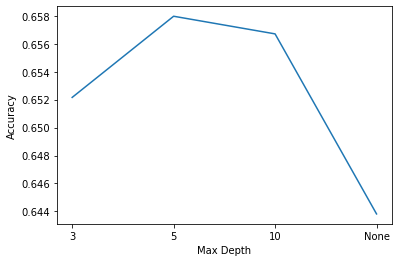

In [16]:
# plotting mean accuracy vs max depth 
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
xticks = ['3', '5', '10', 'None']
plt.plot(xticks, Scores)

#### We observe maximum accuracy at maximum depth 5 

### Visualizing Decision tree

In [17]:
features = df.drop(['Outcome1'], axis = 1).columns.tolist()
target_names = ['Resolved', 'Not Resolved', 'Fatal']

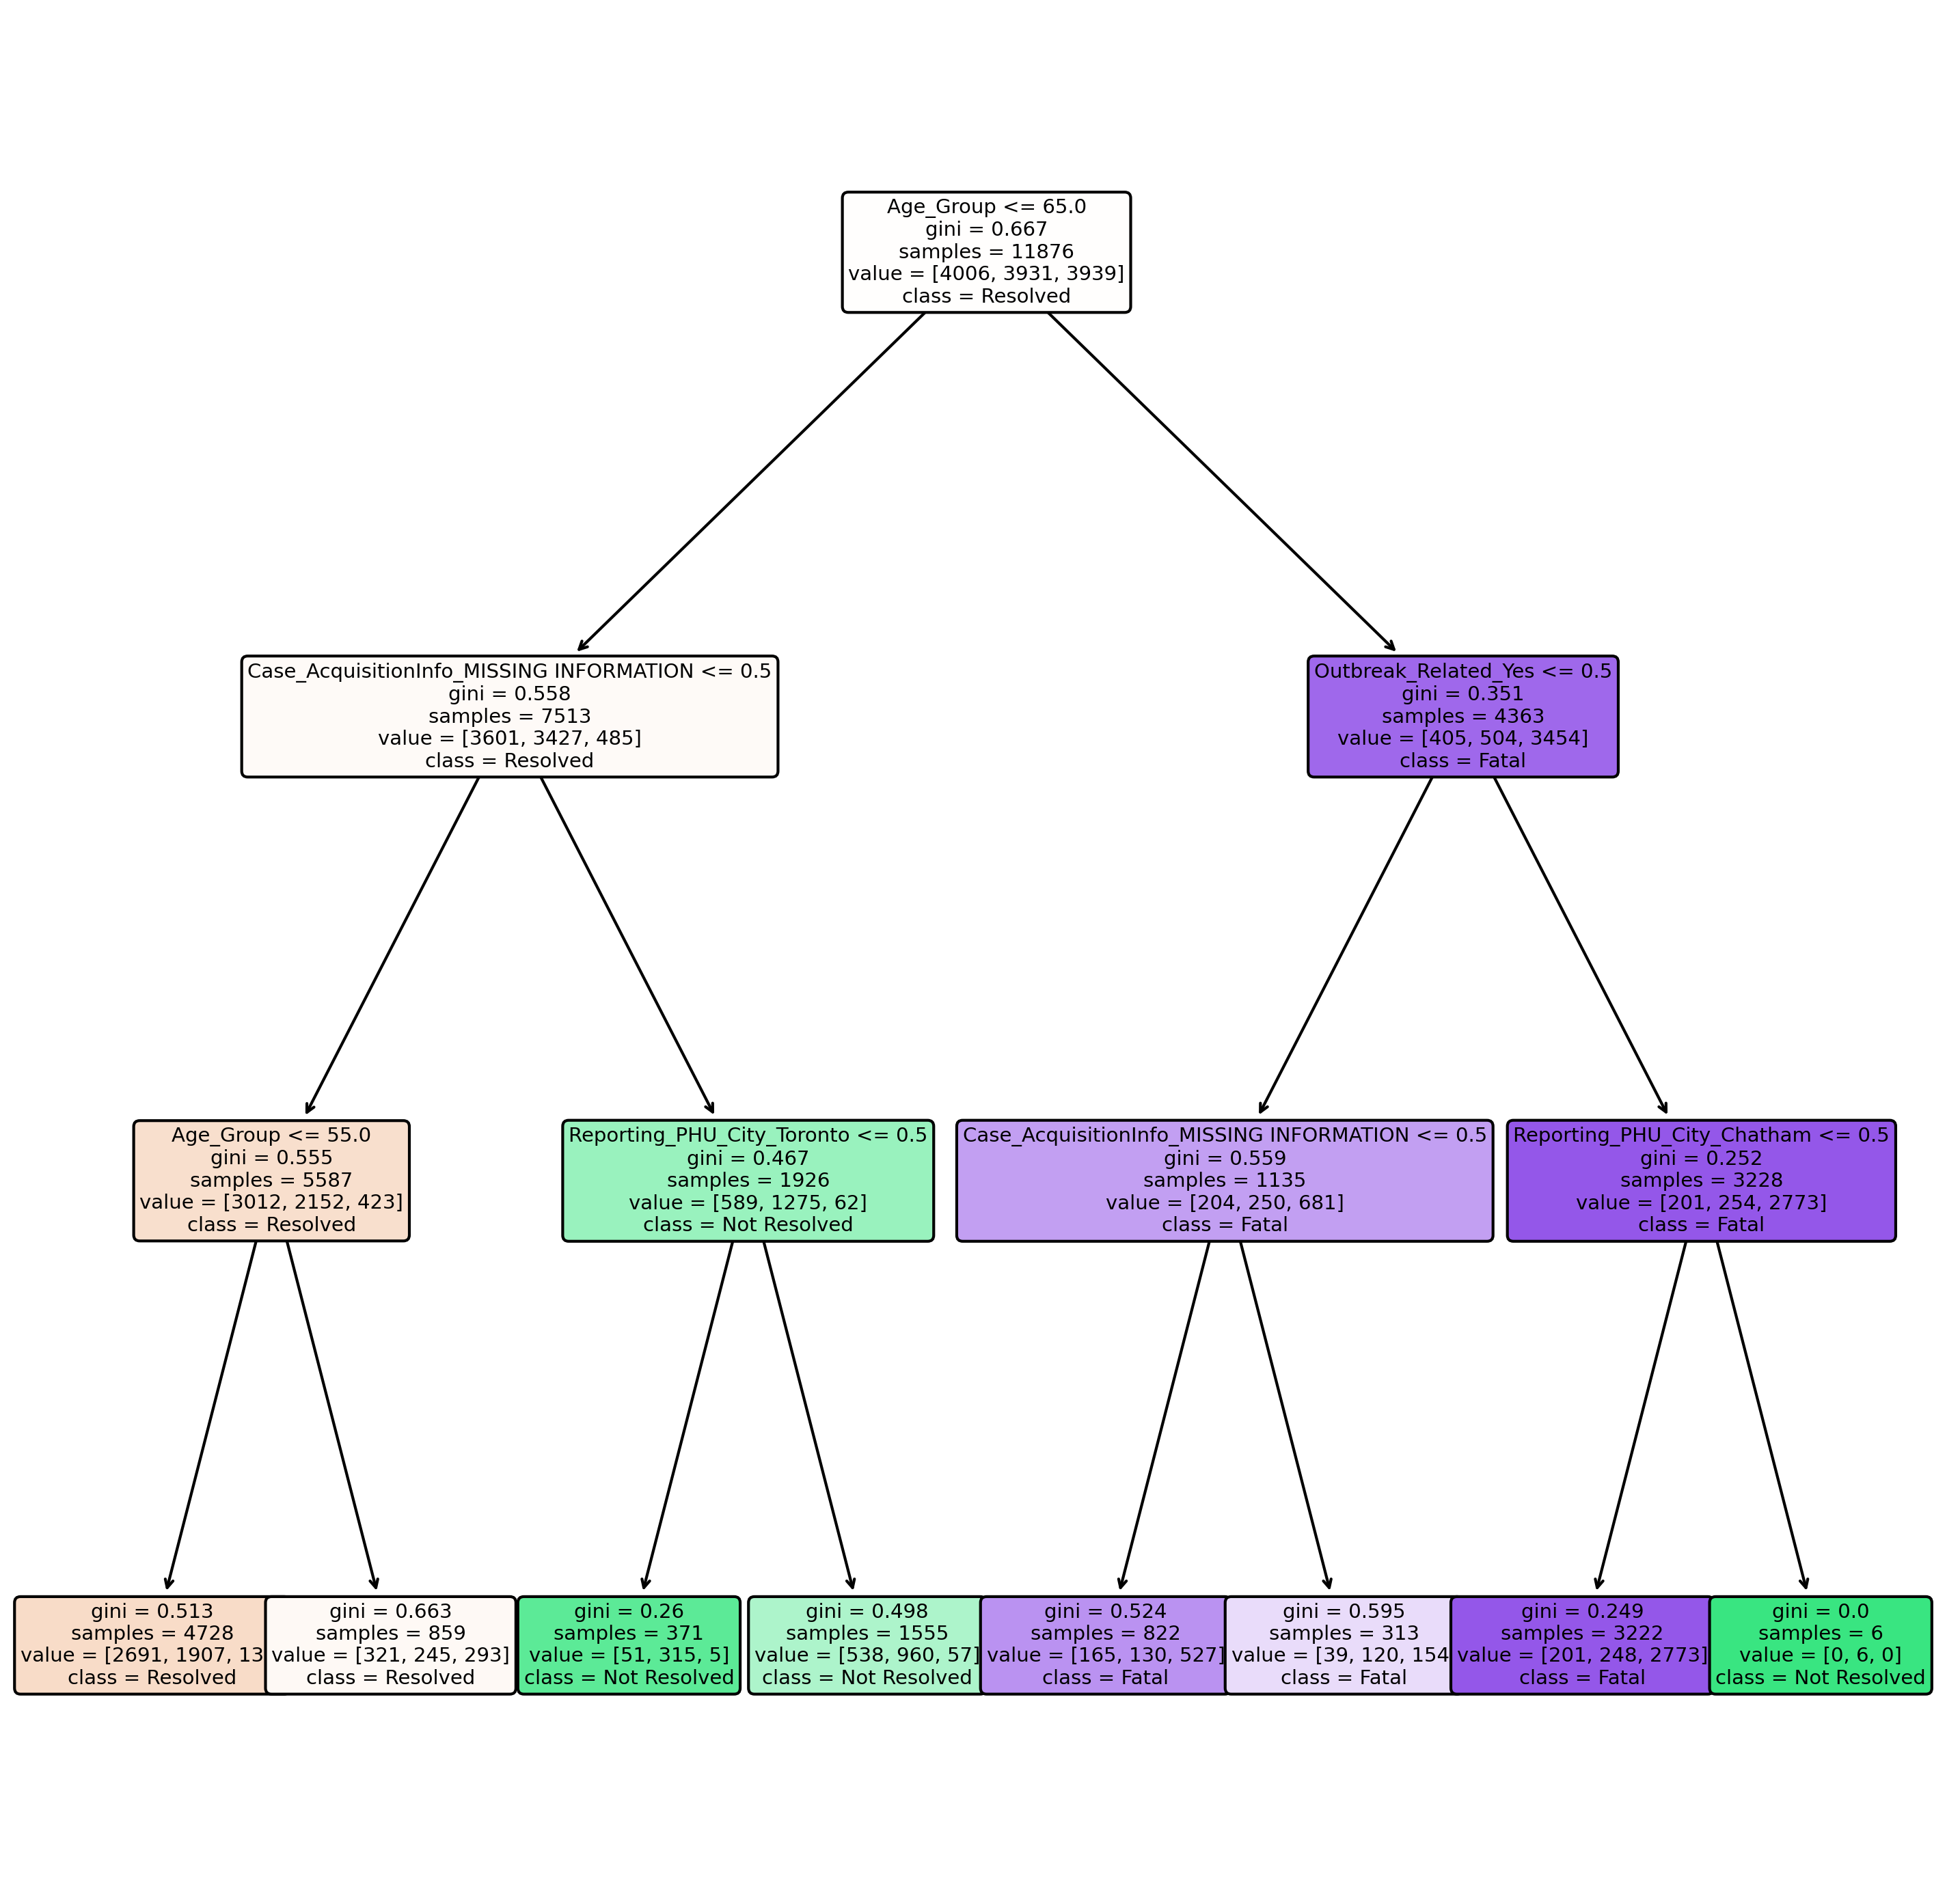

In [18]:
#visualizing the decision tree to analyse splitting rules
from sklearn import tree
clf = DecisionTreeClassifier(random_state=0,max_depth=3)
clf.fit(X_train_val, y_train_val)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,12), dpi=300)
tree.plot_tree(clf,feature_names=features,class_names=target_names,filled=True,fontsize=7, rounded = True) 
#plt.figure()
plt.show()

#### From the decisiont tree plot, we observe:
- the feature 'Age_Group' succesfully seperates Fatal cases from the dataset. The splitting rule Age_Group <= 65.00 indicates that cases involving people older than 65 are predominantly Fatal and are therefore highly vulnerable.
- 'Outbreak_Related' is able to further resolve Fatal cases to a good extent, indicating most of the Fatal cases are related to an Outbreak.
- 'Age_Group' feature is used multiple times indicating it's high classification capability and importance.

In [19]:
%%time
# applying the best value of max depth on test set
clf = DecisionTreeClassifier(max_depth=max_dep, random_state=0)
clf.fit(X_train_val, y_train_val)
y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)
f_score = f1_score(y_test, y_pred, average = 'macro')
print('f-score:', f_score)

Accuracy:  0.6581340518693163
f-score: 0.6415926143094781
Wall time: 43.9 ms


# Random Forest

In [20]:
# find best value for max depth & number of trees parameters using gridsearchcv
param_grid = {
   'max_depth': [3, 5, 10, None],
    'n_estimators' :[5, 10, 50, 150, 200]
       }
       
tree = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=10)
grid_search.fit(X_train_val, y_train_val)
grid_search.best_params_

{'max_depth': 10, 'n_estimators': 200}

In [21]:
# using cross validation on train set to fine tune the max depth & number of trees parameters 
max_depth = [3, 5, 10, None]
number_of_trees = [5, 10, 50, 150, 200]
Scores = []
max_acc=0
max_dep=0
max_trees=0  
for k in max_depth:
    for n in number_of_trees:
        clf = RandomForestClassifier(max_depth=k, n_estimators=n, random_state=0)
        clf.fit(X_train_val, y_train_val)
        print(k, n)
        accuracy = cross_val_score(clf, X_train_val, y_train_val, cv=10, scoring='accuracy')
        print(accuracy.mean())
        Scores.append(accuracy.mean())
        if(accuracy.mean() > max_acc):
            max_acc=accuracy.mean()
            max_dep=k
            max_trees=n
print('The maximum accuracy value is ', max_acc)
print('The best value of maximum depth is ', max_dep) 
print('The best value of number of trees is ', max_trees) 

3 5
0.6438222437801209
3 10
0.6353209857632773
3 50
0.6287492305815812
3 150
0.6335479904351008
3 200
0.6295065935967368
5 5
0.654180388552756
5 10
0.6560320985763277
5 50
0.6620093096082986
5 150
0.6614202258473532
5 200
0.6630199070173797
10 5
0.6642833133355459
10 10
0.6668933791722335
10 50
0.6676523022984691
10 150
0.6679892153775895
10 200
0.6679894281200094
None 5
0.6416327697077486
None 10
0.6476952904501346
None 50
0.6480319907868349
None 150
0.6488736707144458
None 200
0.6505575978827874
The maximum accuracy value is  0.6679894281200094
The best value of maximum depth is  10
The best value of number of trees is  200


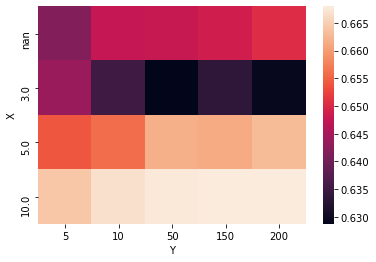

In [22]:
# heat plot - mean accuracies for different values of number of trees and max depth
max_depth = [3,3,3,3,3, 5,5,5,5,5, 10,10,10,10,10, None,None,None,None,None]
number_of_trees = [5,10,50,150,200, 5,10,50,150,200, 5,10,50,150,200, 5,10,50,150,200]
data = pd.DataFrame({'X':max_depth, 'Y': number_of_trees, 'Z': Scores})
data_pivoted = data.pivot("X", "Y", "Z")
ax = sns.heatmap(data_pivoted)
plt.show()

#### We observe that the maximum accuracy is achieved for maximum depth 10, and number of trees 200.

In [23]:
%%time
# applying the best value of depth and number of trees on the test set
clf = RandomForestClassifier(max_depth=max_dep, n_estimators=max_trees, random_state=0)
clf.fit(X_train_val, y_train_val)
y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)
f_score = f1_score(y_test, y_pred, average = 'macro')
print('f-score:', f_score)

Accuracy:  0.6716066015493433
f-score: 0.6621914969162256
Wall time: 1.49 s


# Gradient Tree Boosting

In [24]:
# find best value for number of trees parameter using gridsearchcv
param_grid = {
    'n_estimators' :[5, 10, 50, 150, 200]
       }
       
tree = GradientBoostingClassifier(random_state=0)
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=10)
grid_search.fit(X_train_val, y_train_val)
grid_search.best_params_

{'n_estimators': 50}

In [25]:
# using cross validation on train set to fine tune the number of trees parameter
number_of_trees = [5, 10, 50, 150, 200]
Scores = []
max_acc=0
max_trees=0
for k in number_of_trees:
    clf = GradientBoostingClassifier(n_estimators=k, random_state=0)
    clf.fit(X_train_val, y_train_val)
    accuracy = cross_val_score(clf, X_train_val, y_train_val, cv=10, scoring='accuracy')
    print(accuracy.mean())
    Scores.append(accuracy.mean())
    if(accuracy.mean() > max_acc):
        max_acc=accuracy.mean()
        max_trees=k
print('The maximum accuracy value is ', max_acc)
print('The best value of number of trees is ', max_trees)

0.6597365114214314
0.6604105503220921
0.6669790434533484
0.6667268727715232
0.6661370089550376
The maximum accuracy value is  0.6669790434533484
The best value of number of trees is  50


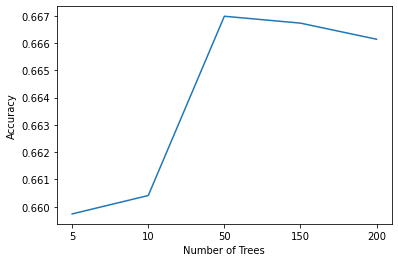

In [26]:
# plotting the mean accuracy versus the number of estimators
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
xticks = ['5', '10', '50', '150', '200']
plt.plot(xticks, Scores)

#### We observe maximum accuracy for number of trees 50.

In [27]:
%%time
# applying the best value of number of trees on test set
clf = GradientBoostingClassifier(n_estimators=max_trees, random_state=0)
clf.fit(X_train_val, y_train_val)
y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)
f_score = f1_score(y_test, y_pred, average = 'macro')
print('f-score:', f_score)

Accuracy:  0.6675648366453352
f-score: 0.6552896231570426
Wall time: 2.44 s


# Question 2 - Naive Bayes (Unprocessed)

In [28]:
from sklearn.naive_bayes import GaussianNB

# find best value for var_smoothing parameter using gridsearchcv
param_grid = {
    'var_smoothing'  :[1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
       }
       
tree = GaussianNB()
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=10)
grid_search.fit(X_train_val, y_train_val)
grid_search.best_params_

{'var_smoothing': 0.001}

In [29]:
# using cross validation on train set to fine tune the var_smoothing parameter
var_smoothing = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
Scores = []
max_acc=0
best_var=0
for var in var_smoothing:
    print(var)
    gnb = GaussianNB(var_smoothing=var)
    gnb.fit(X_train_val, y_train_val)
    accuracy = cross_val_score(gnb, X_train_val, y_train_val, cv=10, scoring='accuracy')
    print(accuracy.mean())
    Scores.append(accuracy.mean())
    if(accuracy.mean() > max_acc):
            max_acc=accuracy.mean()
            best_var=var
print('The maximum accuracy value is ', max_acc)
print('The best value of var_smoothing is ', best_var)

1e-10
0.404520563682316
1e-09
0.45276870076785836
1e-05
0.6033197036356261
0.001
0.6556105140140523
0.1
0.5995321085043074
The maximum accuracy value is  0.6556105140140523
The best value of var_smoothing is  0.001


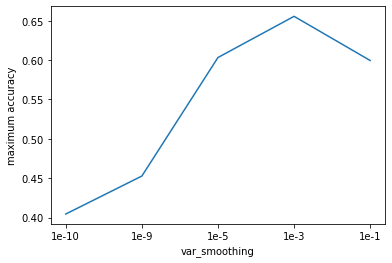

In [30]:
# plotting the mean accuracy versus the number of estimators
plt.xlabel("var_smoothing")
plt.ylabel("maximum accuracy")
xticks = ['1e-10', '1e-9', '1e-5', '1e-3', '1e-1']
plt.plot(xticks, Scores)

#### We observe maximum accuracy for variance smoothing parameters 0.001 (1e-3). Smoothing allows Naive Bayes to better handle cases where evidence has never appeared for a particular category i.e. the problem of zero probability. Var_smoothing is the portion of the largest variance of all features that is added to variances for calculation stability i.e if the predicted value is too small. We observe with increasing smoothing parameter, the accuracy of the model increases to a maximum at 1e-3 , after which it decreases.

In [31]:
%%time
# applying the best value of var_smoothing on test set
gnb = GaussianNB(var_smoothing=best_var)
gnb.fit(X_train_val, y_train_val)
gnb.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)
f_score = f1_score(y_test, y_pred, average = 'macro')
print('f-score:', f_score)

Accuracy:  0.6675648366453352
f-score: 0.6552896231570426
Wall time: 46.9 ms


# Preprocessing

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('covid_train.csv')

In [34]:
# checking for null/NaN values
df.isna().sum()

Age_Group                     6
Client_Gender                 0
Case_AcquisitionInfo          0
Reporting_PHU_City            0
Outbreak_Related           9020
Reporting_PHU_Latitude        0
Reporting_PHU_Longitude       0
Outcome1                      0
dtype: int64

#### We notice NaN values in Age_Group and Outbreak_Related. Since the number of NaN in Age_Group is a small number, we can drop the rows. Whereas, in Outbreak_Related since the feature has Yes/No values, the NaN entries can be considered as No.

In [35]:
# Removing NAn values from age group 
df = df[df['Age_Group'].notna()]

In [36]:
#df = df.drop(['Reporting_PHU_City'],axis=1)

In [37]:
# Replacing NaN values in Outbreak_Related column with No
df['Outbreak_Related'].fillna(value='No', inplace=True)

In [38]:
# checking for null/NaN values
df.isna().sum()

Age_Group                  0
Client_Gender              0
Case_AcquisitionInfo       0
Reporting_PHU_City         0
Outbreak_Related           0
Reporting_PHU_Latitude     0
Reporting_PHU_Longitude    0
Outcome1                   0
dtype: int64

## Feature Selection 

#### We can group insignificant or low occurring categories for the categorical features

In case of feature 'Client_Gender', due to low occurrance, categories 'UNSPECIFIED' & 'GENDER DIVERSE'can be grouped as OTHER

In [39]:
df['Client_Gender'].replace(['UNSPECIFIED', 'GENDER DIVERSE'], 'OTHER', inplace = True)

#### We see 'Reporting_PHU_City', ' Reporting_PHU_Latitude' and 'Reporting_PHU_Longitude'' are features describing the location of the PHU (Public Health Unit). Hence, redundant features can be dropped. Dropping  'Reporting_PHU_City'

In [40]:
df = df.drop(['Reporting_PHU_City'], axis=1)

#### Ordinal encoding 'Áge_Group' and One Hot Encoding the categorical features 'Client_Gender', 'Case_AcquisitionInfo',  'Outbreak_Related'

In [41]:
# one-hot encoding for categorical variables and ordinal encoding for age group column
cats = ['Client_Gender','Case_AcquisitionInfo', 'Outbreak_Related']
df['Outcome1'].replace(['Resolved', 'Not Resolved', 'Fatal'],[0,1,2], inplace = True)
df['Age_Group'].replace(['<20', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s'],[19,20,30,40,50,60,70,80,90], inplace = True)
df_temp = pd.get_dummies(df.iloc[:,:-1], columns=cats, drop_first=True)
df_temp['Outcome1'] = df['Outcome1']
df = df_temp

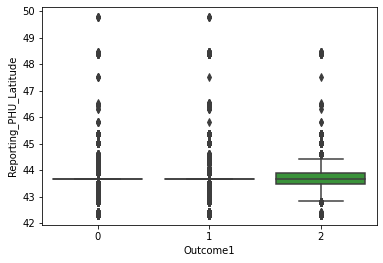

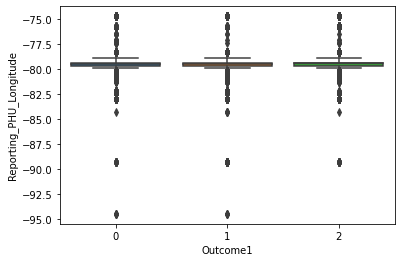

In [42]:
# outlier detection using boxplot
cols = ['Reporting_PHU_Latitude','Reporting_PHU_Longitude']
for column in df[cols]:
    plt.figure()
    ax = sns.boxplot(x='Outcome1', y=column, data=df)
    plt.show()

In [43]:
for column in df[cols]:
    for Outcome1 in df['Outcome1'].unique():    
        q25 = df[column][df['Outcome1'] == Outcome1].quantile(0.25)
        q75 = df[column][df['Outcome1'] == Outcome1].quantile(0.75)
        iqr = q75 - q25
        print(Outcome1, '-', column.upper())
        print('Percentiles: 25th = %.3f, 75th = %.3f, IQR = %.3f' % (q25, q75, iqr))
        
        # Calculate the outlier cutoff
        cut_off = iqr * 1.5
        lower, upper = q25 - cut_off, q75 + cut_off

        # Identify outliers
        df2 = pd.DataFrame(df[df['Outcome1'] == Outcome1][column])

        count = len(df2[df2[column] < lower].index)
        count += len(df2[df2[column] > upper].index)
        print('Identified outliers: ', count)


0 - REPORTING_PHU_LATITUDE
Percentiles: 25th = 43.647, 75th = 43.657, IQR = 0.009
Identified outliers:  2383
1 - REPORTING_PHU_LATITUDE
Percentiles: 25th = 43.647, 75th = 43.657, IQR = 0.009
Identified outliers:  2214
2 - REPORTING_PHU_LATITUDE
Percentiles: 25th = 43.463, 75th = 43.899, IQR = 0.436
Identified outliers:  752
0 - REPORTING_PHU_LONGITUDE
Percentiles: 25th = -79.709, 75th = -79.379, IQR = 0.330
Identified outliers:  1144
1 - REPORTING_PHU_LONGITUDE
Percentiles: 25th = -79.709, 75th = -79.379, IQR = 0.330
Identified outliers:  1086
2 - REPORTING_PHU_LONGITUDE
Percentiles: 25th = -79.709, 75th = -79.379, IQR = 0.330
Identified outliers:  1248


#### We observe a lot of outliers in the Latitude and Longitude features. But handling a lot of outliers either by dropping or replacement will impact the quality of the dataset. Hence we proceed without handling them.

# Processed Dataset

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

# Split processed dataset into train and test sets
X = df.drop(['Outcome1'], axis=1)
y = df['Outcome1']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Decision Tree

In [45]:
# find best value for max depth parameter using gridsearchcv
param_grid = {
   'max_depth': [3, 5, 10, None]
       }

tree = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=10)
grid_search.fit(X_train_val, y_train_val)
grid_search.best_params_

{'max_depth': 5}

In [46]:
# using cross validation on train set to fine tune the max depth parameter 
max_depth = [3, 5, 10, None]
Scores = []
max_acc=0
max_dep=0
for k in max_depth:
    clf = DecisionTreeClassifier(max_depth=k, random_state=0)
    clf.fit(X_train_val, y_train_val)
    accuracy = cross_val_score(clf, X_train_val, y_train_val, cv=10, scoring='accuracy')
    print(accuracy.mean())
    Scores.append(accuracy.mean())
    if(accuracy.mean() > max_acc):
        max_acc=accuracy.mean()
        max_dep=k
print('The maximum accuracy value is ', max_acc)
print('The best value of maximum depth is ', max_dep) 

0.6518217842564936
0.6579682673406346
0.653169011088135
0.6430630369973251
The maximum accuracy value is  0.6579682673406346
The best value of maximum depth is  5


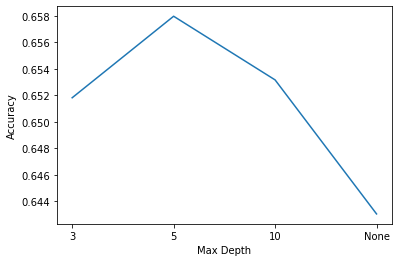

In [47]:
# plotting mean accuracy vs max depth 
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
xticks = ['3', '5', '10', 'None']
plt.plot(xticks, Scores)

#### We observe that the maximum accuracy is achieved for maximum depth of 5.

### Visualizing Decision Tree

In [48]:
features = df.drop(['Outcome1'], axis = 1).columns.tolist()
target_names = ['Resolved', 'Not Resolved', 'Fatal']

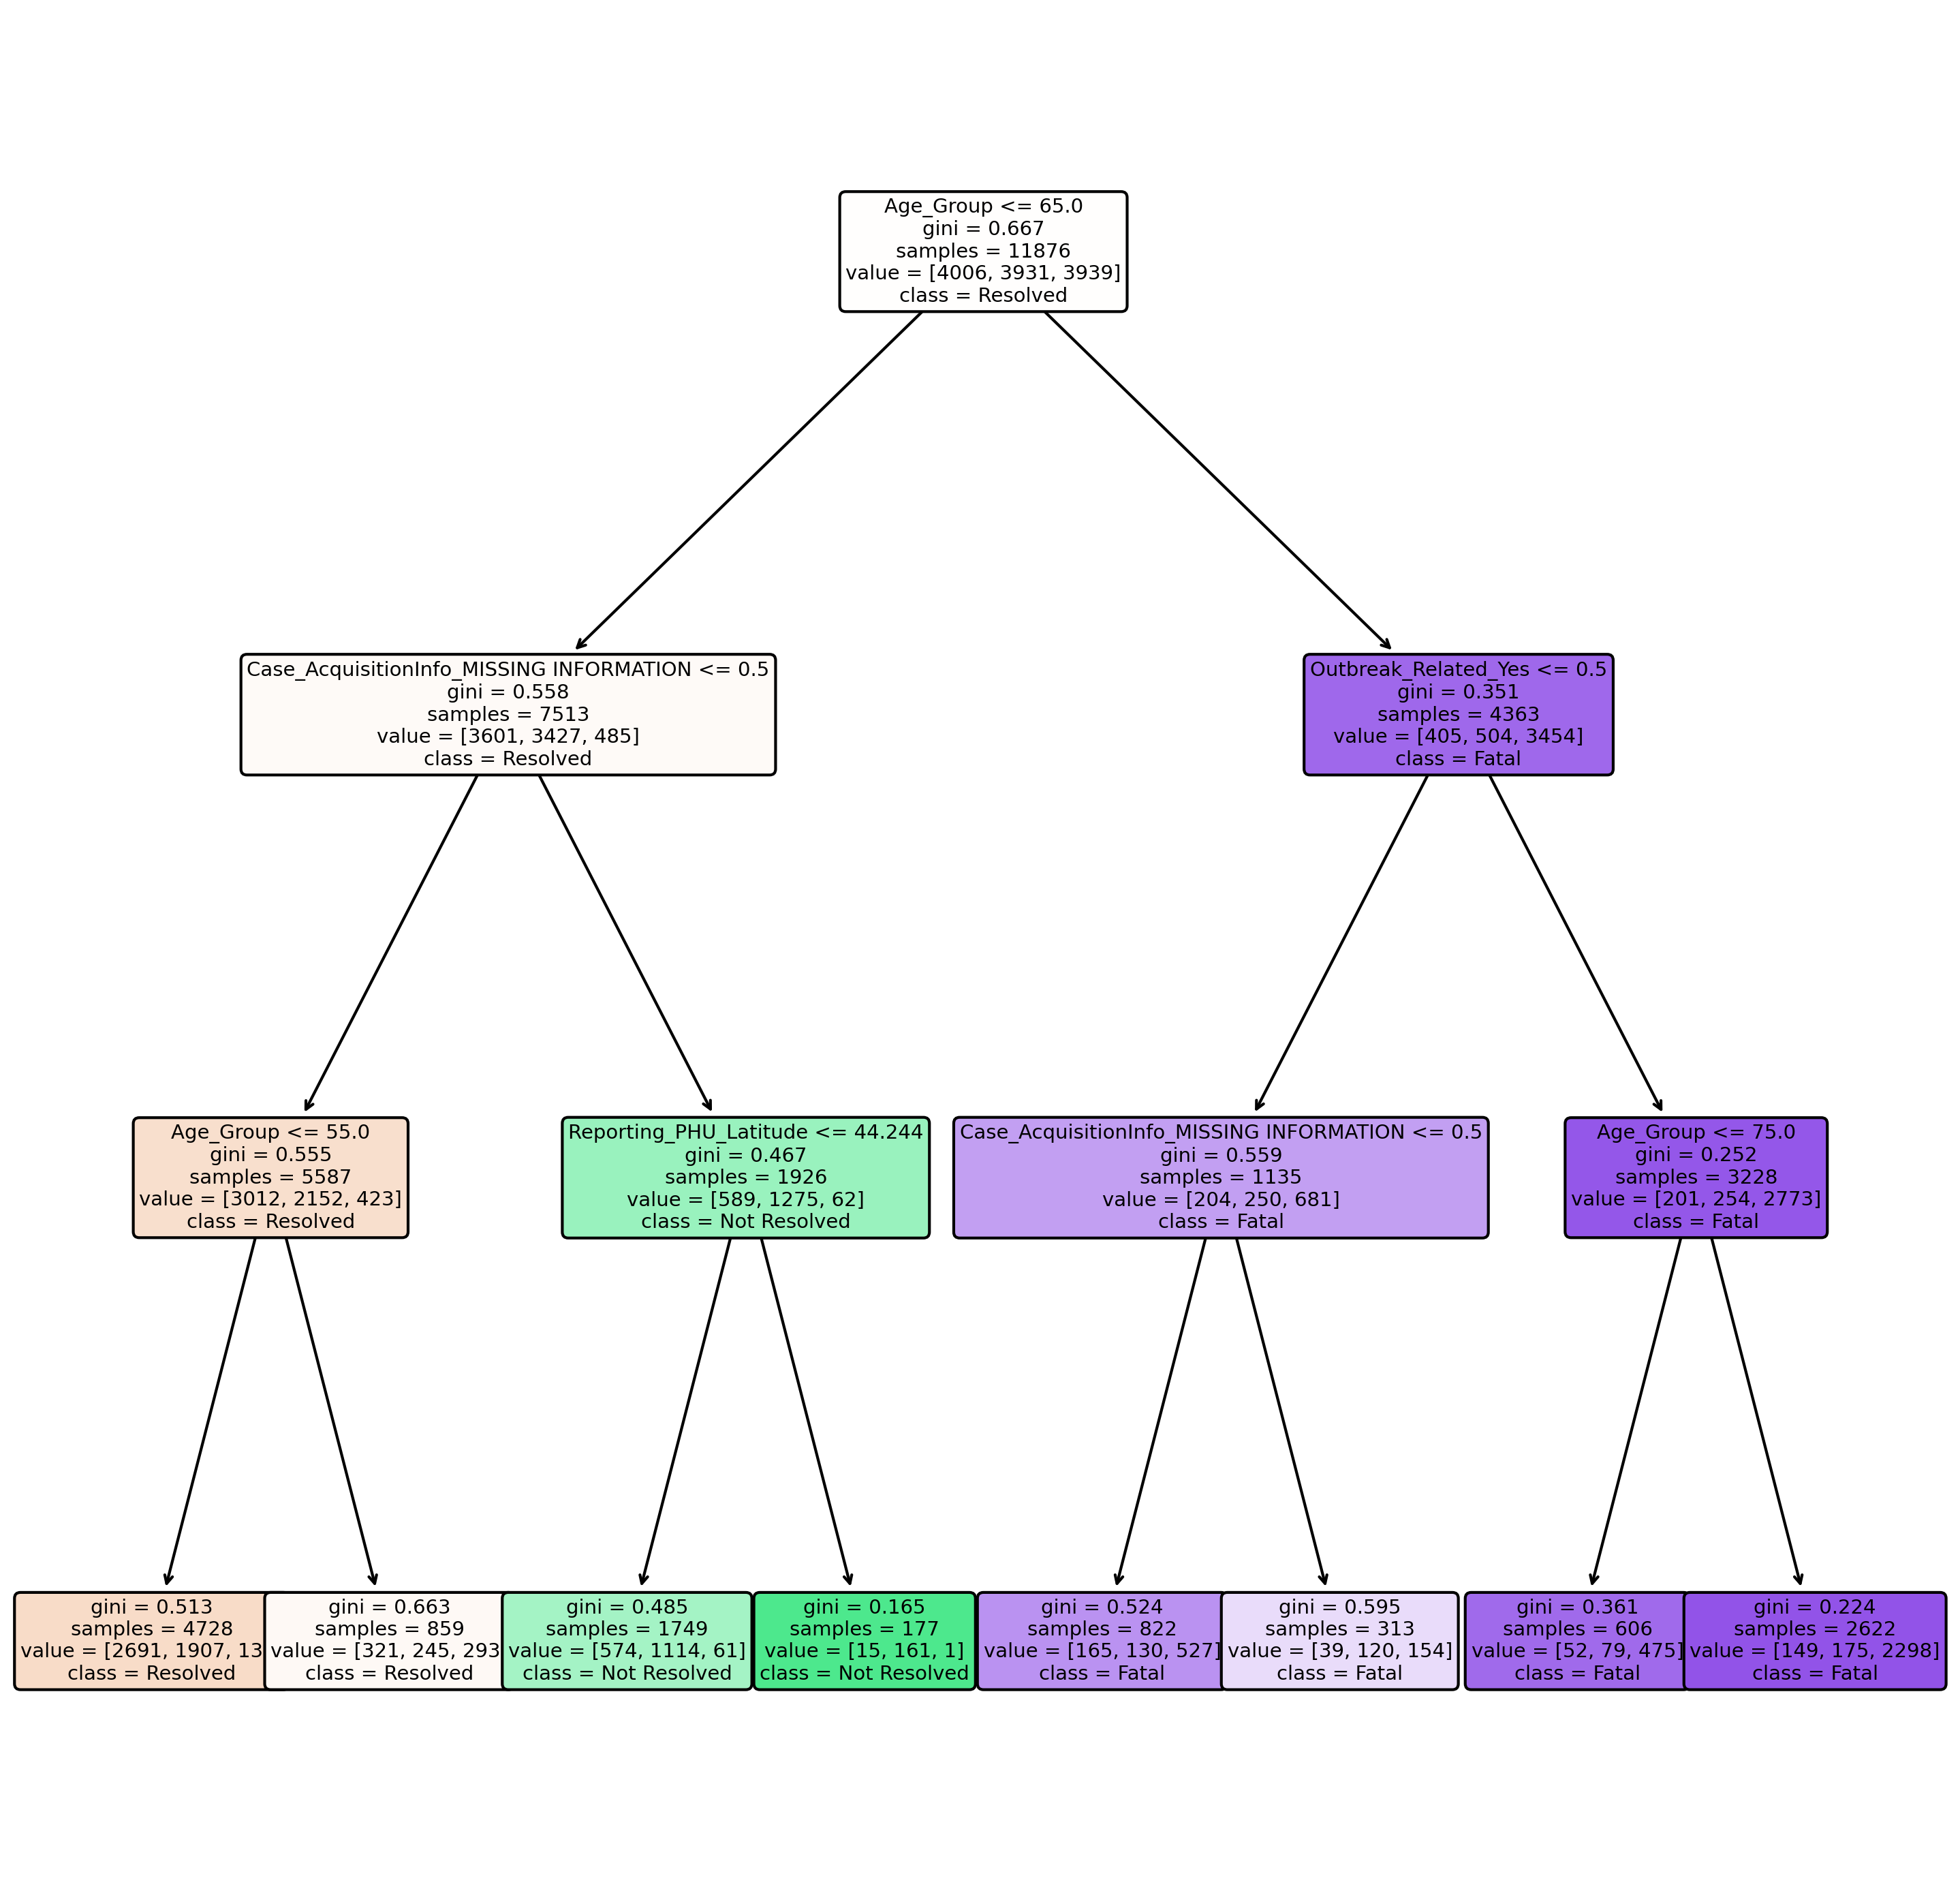

In [49]:
#visualizing the decision tree to analyse splitting rules
from sklearn import tree
clf = DecisionTreeClassifier(random_state=0,max_depth=3)
clf.fit(X_train_val, y_train_val)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,12), dpi=300)
tree.plot_tree(clf,feature_names=features,class_names=target_names,filled=True,fontsize=7, rounded = True) 
#plt.figure()
plt.show()

In [50]:
text_representation = tree.export_text(clf,feature_names=features)
print(text_representation)

|--- Age_Group <= 65.00
|   |--- Case_AcquisitionInfo_MISSING INFORMATION <= 0.50
|   |   |--- Age_Group <= 55.00
|   |   |   |--- class: 0
|   |   |--- Age_Group >  55.00
|   |   |   |--- class: 0
|   |--- Case_AcquisitionInfo_MISSING INFORMATION >  0.50
|   |   |--- Reporting_PHU_Latitude <= 44.24
|   |   |   |--- class: 1
|   |   |--- Reporting_PHU_Latitude >  44.24
|   |   |   |--- class: 1
|--- Age_Group >  65.00
|   |--- Outbreak_Related_Yes <= 0.50
|   |   |--- Case_AcquisitionInfo_MISSING INFORMATION <= 0.50
|   |   |   |--- class: 2
|   |   |--- Case_AcquisitionInfo_MISSING INFORMATION >  0.50
|   |   |   |--- class: 2
|   |--- Outbreak_Related_Yes >  0.50
|   |   |--- Age_Group <= 75.00
|   |   |   |--- class: 2
|   |   |--- Age_Group >  75.00
|   |   |   |--- class: 2



In [51]:
# importance of features in decision tree classification
importances = pd.DataFrame({'feature':features,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
print(importances)

                                      feature  importance
0                                   Age_Group       0.880
5    Case_AcquisitionInfo_MISSING INFORMATION       0.079
10                       Outbreak_Related_Yes       0.032
1                      Reporting_PHU_Latitude       0.008
2                     Reporting_PHU_Longitude       0.000
3                          Client_Gender_MALE       0.000
4                         Client_Gender_OTHER       0.000
6      Case_AcquisitionInfo_NO KNOWN EPI LINK       0.000
7                     Case_AcquisitionInfo_OB       0.000
8                 Case_AcquisitionInfo_TRAVEL       0.000
9   Case_AcquisitionInfo_UNSPECIFIED EPI LINK       0.000


#### From the decisiont tree plot, we observe:
- the feature 'Age_Group' succesfully seperates Fatal cases from the dataset. The splitting rule Age_Group <= 65.00 indicates that cases involving people older than 65 are predominantly Fatal and are therefore highly vulnerable.
- 'Outbreak_Related' is able to further resolve Fatal cases to a good extent, indicating most of the Fatal cases are related to an Outbreak.
- 'Age_Group' feature is used multiple times indicating it's high classification capability and importance.

In [52]:
%%time
# applying the best value of max depth on test set
clf = DecisionTreeClassifier(max_depth=max_dep, random_state=0)
clf.fit(X_train_val, y_train_val)
y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)
f_score = f1_score(y_test, y_pred, average = 'macro')
print('f-score:', f_score)

Accuracy:  0.6591444930953183
f-score: 0.6418284656725305
Wall time: 20.9 ms


# Random Forest

In [53]:
# find best value for max depth & number of trees parameters using gridsearchcv
param_grid = {
   'max_depth': [3, 5, 10, None],
    'n_estimators' :[5, 10, 50, 150, 200]
       }
       
tree = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=10)
grid_search.fit(X_train_val, y_train_val)
grid_search.best_params_

{'max_depth': 5, 'n_estimators': 150}

In [54]:
# using cross validation on train set to fine tune the max depth & number of trees parameters 
max_depth = [3, 5, 10, None]
number_of_trees = [5, 10, 50, 150, 200]
Scores = []
max_acc=0
max_dep=0
max_trees=0  
for k in max_depth:
    for n in number_of_trees:
        clf = RandomForestClassifier(max_depth=k, n_estimators=n, random_state=0)
        clf.fit(X_train_val, y_train_val)
        print(k, n)
        accuracy = cross_val_score(clf, X_train_val, y_train_val, cv=10, scoring='accuracy')
        print(accuracy.mean())
        Scores.append(accuracy.mean())
        if(accuracy.mean() > max_acc):
            max_acc=accuracy.mean()
            max_dep=k
            max_trees=n
print('The maximum accuracy value is ', max_acc)
print('The best value of maximum depth is ', max_dep) 
print('The best value of number of trees is ', max_trees) 

3 5
0.6611665659685879
3 10
0.6589775882951956
3 50
0.6630199779315197
3 150
0.6608305747732875
3 200
0.6619258436655235
5 5
0.6613357671066181
5 10
0.6628517695914494
5 50
0.6659677369028676
5 150
0.6659679496452875
5 200
0.6655468614819922
10 5
0.6616747366957982
10 10
0.6628525496469894
10 50
0.6624321706250939
10 150
0.6641160268792956
10 200
0.6640315681385605
None 5
0.6444118948541864
None 10
0.6470216061201739
None 50
0.6487904884282307
None 150
0.6483689038659552
None 200
0.6487897083726907
The maximum accuracy value is  0.6659679496452875
The best value of maximum depth is  5
The best value of number of trees is  150


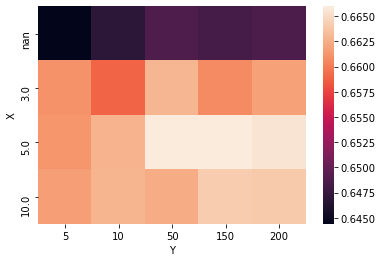

In [55]:
# heat plot - mean accuracies for different values of number of trees and max depth
max_depth = [3,3,3,3,3, 5,5,5,5,5, 10,10,10,10,10, None,None,None,None,None]
number_of_trees = [5,10,50,150,200, 5,10,50,150,200, 5,10,50,150,200, 5,10,50,150,200]
data = pd.DataFrame({'X':max_depth, 'Y': number_of_trees, 'Z': Scores})
data_pivoted = data.pivot("X", "Y", "Z")
ax = sns.heatmap(data_pivoted)
plt.show()

#### We observe maximum accuracy  at maximum depth 5 and number of trees 150

In [56]:
%%time
# applying the best value of depth and number of trees on the test set
clf = RandomForestClassifier(max_depth=max_dep, n_estimators=max_trees, random_state=0)
clf.fit(X_train_val, y_train_val)
y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)
f_score = f1_score(y_test, y_pred, average = 'macro')
print('f-score:', f_score)

Accuracy:  0.6645335129673291
f-score: 0.6504050651194201
Wall time: 1.28 s


# Gradient Tree Boosting

In [57]:
# find best value for number of trees parameter using gridsearchcv
param_grid = {
    'n_estimators' :[5, 10, 50, 150, 200]
       }
       
tree = GradientBoostingClassifier(random_state=0)
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=10)
grid_search.fit(X_train_val, y_train_val)
grid_search.best_params_

{'n_estimators': 200}

In [58]:
# using cross validation on train set to fine tune the number of trees parameter
number_of_trees = [5, 10, 50, 150, 200]
Scores = []
max_acc=0
max_trees=0
for k in number_of_trees:
    clf = GradientBoostingClassifier(n_estimators=k, random_state=0)
    clf.fit(X_train_val, y_train_val)
    accuracy = cross_val_score(clf, X_train_val, y_train_val, cv=10, scoring='accuracy')
    print(accuracy.mean())
    Scores.append(accuracy.mean())
    if(accuracy.mean() > max_acc):
        max_acc=accuracy.mean()
        max_trees=k
print('The maximum accuracy value is ', max_acc)
print('The best value of number of trees is ', max_trees) 

0.6593154232581361
0.6599894621587967
0.6637790428860353
0.6642849443607657
0.6668104805425783
The maximum accuracy value is  0.6668104805425783
The best value of number of trees is  200


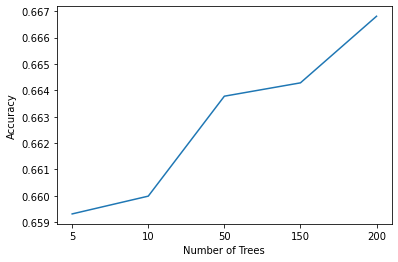

In [59]:
# plotting the mean accuracy versus the number of estimators
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
xticks = ['5', '10', '50', '150', '200']
plt.plot(xticks, Scores)

#### We observe maximum accuracy at number of trees 200

In [60]:
%%time
# applying the best value of number of trees on test set
clf = GradientBoostingClassifier(n_estimators=max_trees, random_state=0)
clf.fit(X_train_val, y_train_val)
y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)
f_score = f1_score(y_test, y_pred, average = 'macro')
print('f-score:', f_score)

Accuracy:  0.6722802290333446
f-score: 0.6624100366524396
Wall time: 6.88 s


# Question 2 - Naive Bayes (Processed Dataset)

In [61]:
from sklearn.naive_bayes import GaussianNB

# find best value for var_smoothing parameter using gridsearchcv
param_grid = {
    'var_smoothing'  :[1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
       }
       
tree = GaussianNB()
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=10)
grid_search.fit(X_train_val, y_train_val)
grid_search.best_params_

{'var_smoothing': 0.001}

In [62]:
# using cross validation on train set to fine tune the var_smoothing parameter
var_smoothing = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
Scores = []
max_acc=0
best_var=0
for var in var_smoothing:
    print(var)
    gnb = GaussianNB(var_smoothing=var)
    gnb.fit(X_train_val, y_train_val)
    accuracy = cross_val_score(gnb, X_train_val, y_train_val, cv=10, scoring='accuracy')
    print(accuracy.mean())
    Scores.append(accuracy.mean())
    if(accuracy.mean() > max_acc):
            max_acc=accuracy.mean()
            best_var=var
print('The maximum accuracy value is ', max_acc)
print('The best value of var_smoothing is ', best_var)

1e-10
0.5508603303464297
1e-09
0.5508603303464297
1e-05
0.6111514612567688
0.001
0.6545165215763362
0.1
0.5981007775026309
The maximum accuracy value is  0.6545165215763362
The best value of var_smoothing is  0.001


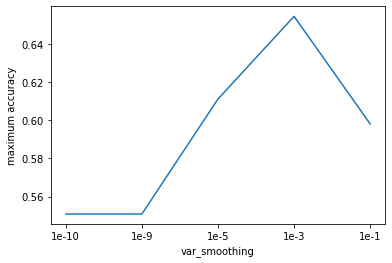

In [63]:
# plotting the mean accuracy versus the number of estimators
plt.xlabel("var_smoothing")
plt.ylabel("maximum accuracy")
xticks = ['1e-10', '1e-9', '1e-5', '1e-3', '1e-1']
plt.plot(xticks, Scores)

#### We observe same maximum accuracy for variance smoothing parameters 0.001 (1e-3). Smoothing allows Naive Bayes to better handle cases where evidence has never appeared for a particular category i.e. the problem of zero probability. We observe with increasing smoothing parameter, the accuracy of the model remains constant, peaks at 0.001 and again decreases.

In [64]:
%%time
# applying the best value of var_smoothing on test set
gnb = GaussianNB(var_smoothing=best_var)
gnb.fit(X_train_val, y_train_val)
gnb.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)
f_score = f1_score(y_test, y_pred, average = 'macro')
print('f-score:', f_score) 

Accuracy:  0.6722802290333446
f-score: 0.6624100366524396
Wall time: 22.9 ms


### NB learned Parameters theta_ (mean) and sigma_ (variance) 

In [65]:
# mean 
gnb.theta_

array([[ 3.84338492e+01,  4.37274733e+01, -7.95909554e+01,
         4.97254119e-01,  6.24063904e-03,  1.59760359e-01,
         2.05941088e-01,  1.75736395e-01,  1.72241638e-02,
         9.98502247e-04,  2.09685472e-01],
       [ 4.02877131e+01,  4.37725211e+01, -7.96265344e+01,
         4.90714831e-01,  9.41236327e-03,  3.56652251e-01,
         1.32790639e-01,  1.85703383e-01,  9.92113966e-03,
         0.00000000e+00,  2.16229967e-01],
       [ 7.82528561e+01,  4.37284837e+01, -7.94626338e+01,
         4.74739782e-01,  7.10840315e-03,  7.53998477e-02,
         9.92637725e-02,  7.36481340e-01,  1.24397055e-02,
         0.00000000e+00,  7.62122366e-01]])

In [66]:
# variance
gnb.sigma_

array([[359.88055087,   1.13713585,   3.01213355,   0.87992674,
          0.63613597,   0.76417127,   0.79346364,   0.77478739,
          0.64686177,   0.63093178,   0.79565175],
       [390.80383317,   1.2637536 ,   3.10508876,   0.87984807,
          0.63925805,   0.8593857 ,   0.74509156,   0.78115192,
          0.63975699,   0.62993428,   0.79940885],
       [132.03845303,   1.17192068,   3.20262092,   0.8792962 ,
          0.63699215,   0.69964899,   0.71934476,   0.82401086,
          0.64221924,   0.62993428,   0.81122614]])

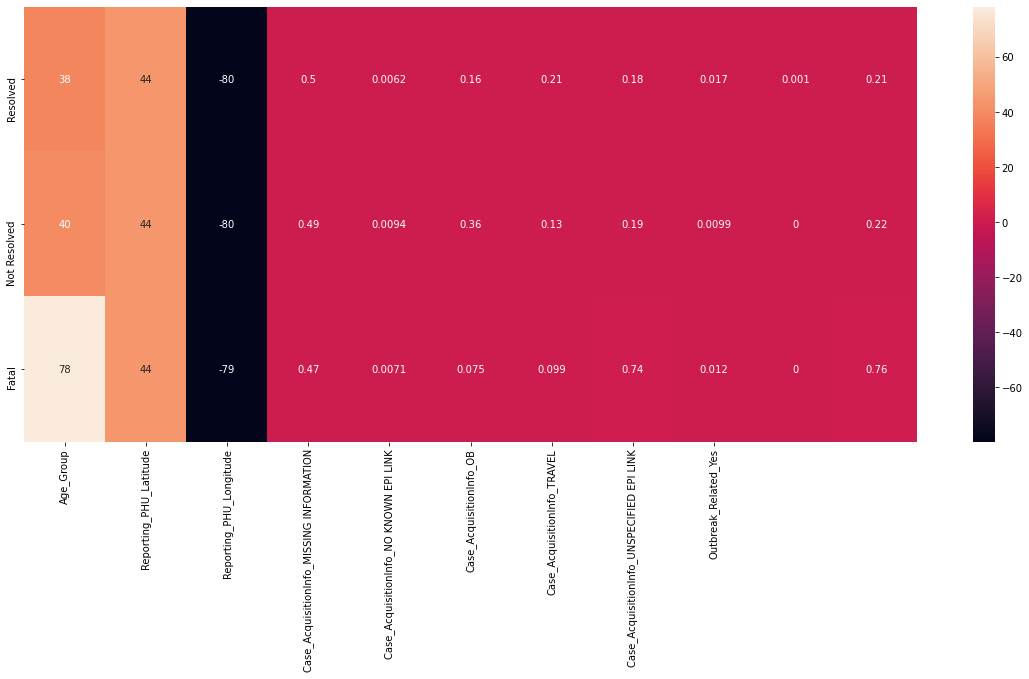

In [67]:
x_axis_labels = ['Age_Group', 'Reporting_PHU_Latitude', 'Reporting_PHU_Longitude',
       'Case_AcquisitionInfo_MISSING INFORMATION',
       'Case_AcquisitionInfo_NO KNOWN EPI LINK', 'Case_AcquisitionInfo_OB',
       'Case_AcquisitionInfo_TRAVEL',
       'Case_AcquisitionInfo_UNSPECIFIED EPI LINK', 'Outbreak_Related_Yes'] # labels for x-axis
y_axis_labels = ['Resolved','Not Resolved','Fatal'] # labels for y-axis

# create seabvorn heatmap with required labels
fig, ax = plt.subplots(figsize=(20,8))
sns.heatmap(gnb.theta_, xticklabels=x_axis_labels, yticklabels=y_axis_labels,annot=True)

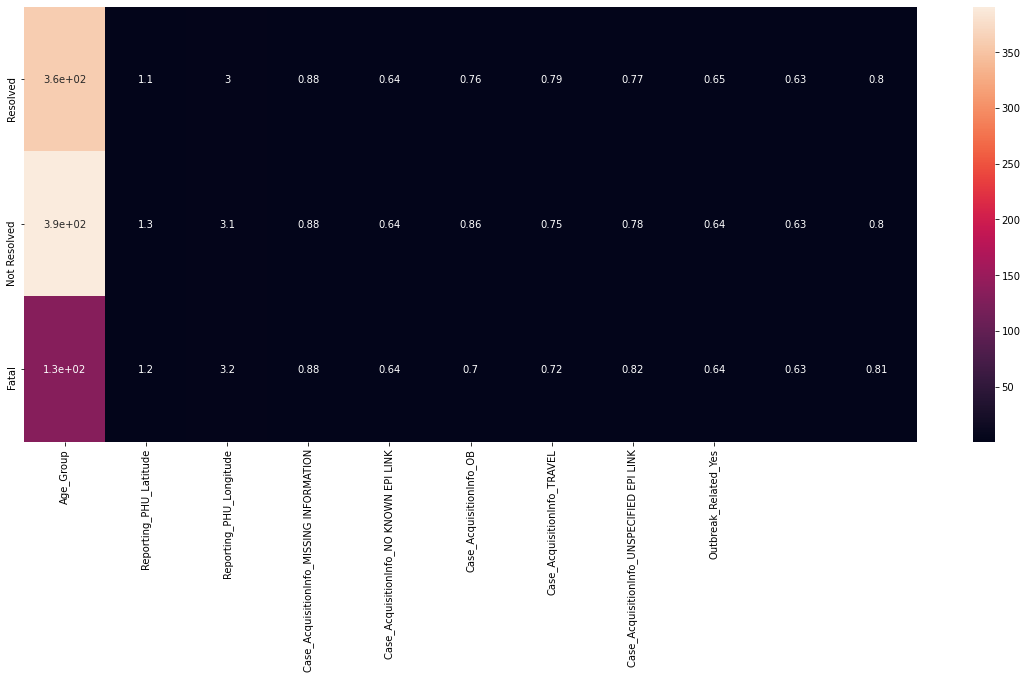

In [68]:
# create seabvorn heatmap with required labels
fig, ax = plt.subplots(figsize=(20,8))
sns.heatmap(gnb.sigma_, xticklabels=x_axis_labels, yticklabels=y_axis_labels,annot=True)

# [CM6]

### Covid Dataset :

In Decision tree, we observe maximum accuracy of 65.7% at maximum depth of 5 on the training set with 10 fold cross validation. The model gives an accuracy of 65.9% on the test set. We see that the accuracy increases from depth 3, maximizing at 5 and further decreases at depth 10.

In Random Forest, we observe maximum accuracy of 66.5% at the maximum depth of 5 and 150 independent tress on the training set with 10 fold cross validation. The model gives an accuracy of 66.4% on the test set. 

In Gradient Tree Boosting, we observe maximum accuracy of 66.7% with 200 tress on the training set with 10 fold cross validation. The model also gives an accuracy of 67.2% on the test set. 

In Naive Bayes Classifier, we observe maximum accuracy of 65.46% with a variance smoothing parameter 0.001 (1e-3). The model gives an accuracy of 67.2% on the test set. We notice that the accuracy for variance smoothing parameters 1e-10, 1e-9, 1e-5, is same with aspike in 1e-3 and then decreases for 1e-1. Laplace smoothing is a smoothing technique that helps tackle the problem of zero probability in the Naïve Bayes machine learning algorithm.

Comparing the classifiers, we notice that Naive Baiyes has better performance (comparable to Gradient Tree Boosting) on the test set than the Decision tree approaches. Decision tree is a discriminative model, whereas Naive bayes is a generative model. Also, Naive bayes is computationally faster than tree based classifiers.

#### From the NB learned parameters of 'theta_' (mean) and 'sigma_' (variance) , We observe:

- A feature can be considered good seperator, if the mean of the feature for disctinct classes are far apart, and if the variance of the features are low indicating the values are closer to te mean.

- the learned parameter 'theta_' (mean) of feature 'Age_Group' is similar for Resolved & Not Resolved and different from Class Fatal. Also 'sigma_' (variance) is relatively less for this feature against class Fatal, indicating all the values are spaced close to the mean. Thus this feature 'Age_Group' can be used to distinguish Fatal cases effectively.   This is observed in the decision tree classifier aswell, where the splitting rule Age_Group <= 65.00 successfully seperates Fatal cases from rest of the dataset. 

- Similarly the feature Outbreak_Related_Yes has a high mean for the class Fatal compared to rest of the classes, indicating most of the Fatal cases are related to Outbreak. This is observed in the decision tree classifier aswell, where the splitting rule Outbreak_Related_Yes <= 0.50 seperates Fatal cases to a good extent.